### lab 5 
Name: Naveed Ali
Roll number: 20L-1244

In [128]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### For Cancer Data 

In [129]:
file1 = pd.read_csv('cancer_data.csv')
file1.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


### Task1 , We will pe performing Data Analysis

In [130]:
file1.shape

(569, 32)

In [131]:
# now we will check the null values in the dataset
nullval = file1.isnull().sum()
print(nullval)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


It means the data is rich

In [132]:
#now we will check the count of redundant values in the dataset
redundantval = file1.duplicated().sum()
print(redundantval)

0


In [133]:
# now we will convert the categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder
nb = OneHotEncoder()
file1['diagnosis'] = nb.fit_transform(file1['diagnosis'].values.reshape(-1,1)).toarray()
file1.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,1.0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,1.0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,1.0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,0.0,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,0.0,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,1.0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


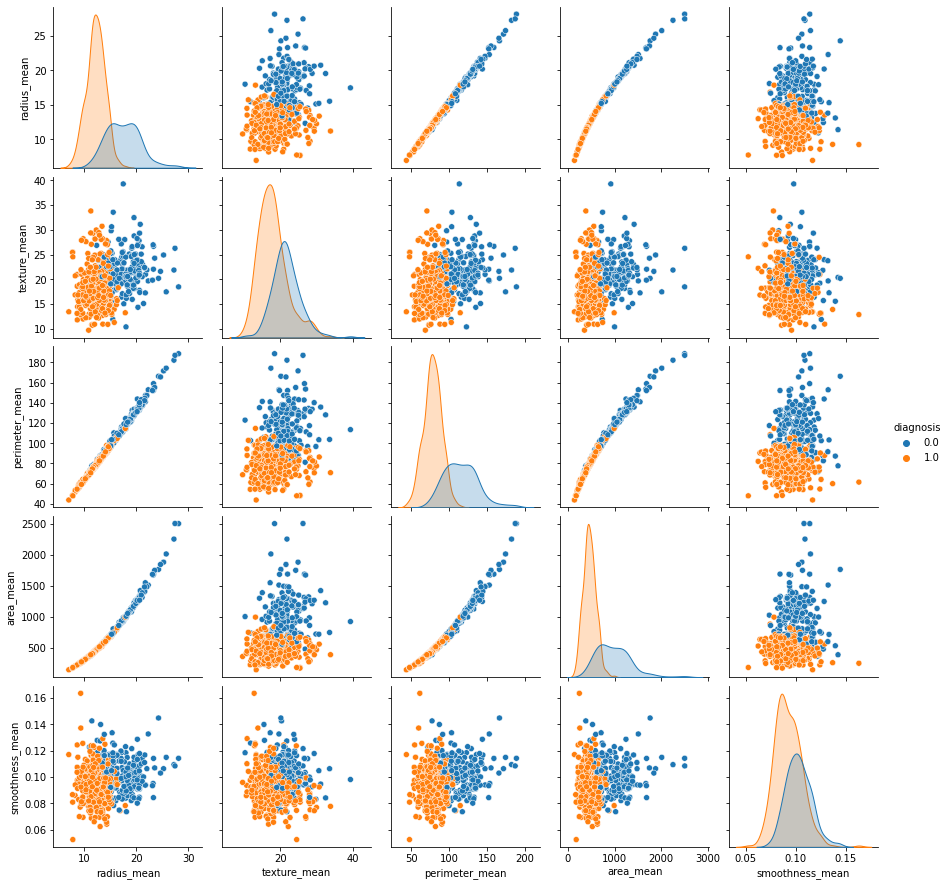

In [134]:
# now we will visualize the data
sns.pairplot(file1, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

the previous plots explains us that the data is rich

### Data Preprocessing

In [135]:
#now we will apply data preprocessing
from sklearn.model_selection import train_test_split
X = file1.drop(['diagnosis'], axis=1)
y = file1['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Naive Bayes Classifier

In [136]:
# now we will apply the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5964912280701754


In [137]:
# now we will apply the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
# we will apply the Gaussian Naive Bayes algorithm but he will do hyperparameter tuning
nb2 = GaussianNB(var_smoothing=1e-09, priors=None,)
nb2.fit(X_train, y_train) # we will fit the model
y_pred2 = nb.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.5964912280701754


<AxesSubplot:>

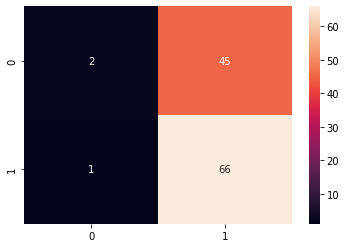

In [138]:
#visualizing the data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [139]:
#calculating the F-1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


0.7415730337078653

# Decision Tree Classifier


In [140]:
#now we will apply the Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9122807017543859


In [158]:
# apply decision tree with hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=5)
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9996908332045138


<AxesSubplot:>

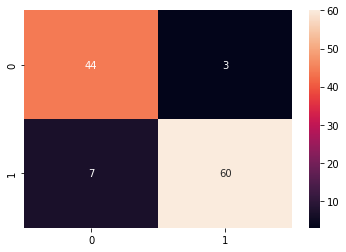

In [141]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [142]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.923076923076923

# Adult Data 

In [143]:
file2 = pd.read_csv('adult.csv')
file2.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Data preprocessing and EDA

In [144]:
# now we will give the name to the columns
file2.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
file2.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [145]:
# now we will convert the categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder
nb = OneHotEncoder()
file2['income'] = nb.fit_transform(file2['income'].values.reshape(-1,1)).toarray()
#apply the one hot encoding to the categorical data
file2.tail()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1.0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0.0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1.0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1.0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,0.0


In [146]:
# now apply one hot encoding to the categorical data
file2['workclass'] = nb.fit_transform(file2['workclass'].values.reshape(-1,1)).toarray()
file2['education'] = nb.fit_transform(file2['education'].values.reshape(-1,1)).toarray()
file2['marital_status'] = nb.fit_transform(file2['marital_status'].values.reshape(-1,1)).toarray()
file2['occupation'] = nb.fit_transform(file2['occupation'].values.reshape(-1,1)).toarray()
file2['relationship'] = nb.fit_transform(file2['relationship'].values.reshape(-1,1)).toarray()
file2['race'] = nb.fit_transform(file2['race'].values.reshape(-1,1)).toarray()
file2['sex'] = nb.fit_transform(file2['sex'].values.reshape(-1,1)).toarray()
file2['native_country'] = nb.fit_transform(file2['native_country'].values.reshape(-1,1)).toarray()

file2.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32555,27,0.0,257302,0.0,12,0.0,0.0,0.0,0.0,1.0,0,0,38,0.0,1.0
32556,40,0.0,154374,0.0,9,0.0,0.0,1.0,0.0,0.0,0,0,40,0.0,0.0
32557,58,0.0,151910,0.0,9,0.0,0.0,0.0,0.0,1.0,0,0,40,0.0,1.0
32558,22,0.0,201490,0.0,9,0.0,0.0,0.0,0.0,0.0,0,0,20,0.0,1.0
32559,52,0.0,287927,0.0,9,0.0,0.0,0.0,0.0,1.0,15024,0,40,0.0,0.0


In [148]:
redundantval = file2.duplicated().sum()
print(redundantval)

120


In [150]:
file2.drop_duplicates(inplace=True)
redundantval = file2.duplicated().sum()
print(redundantval)

0


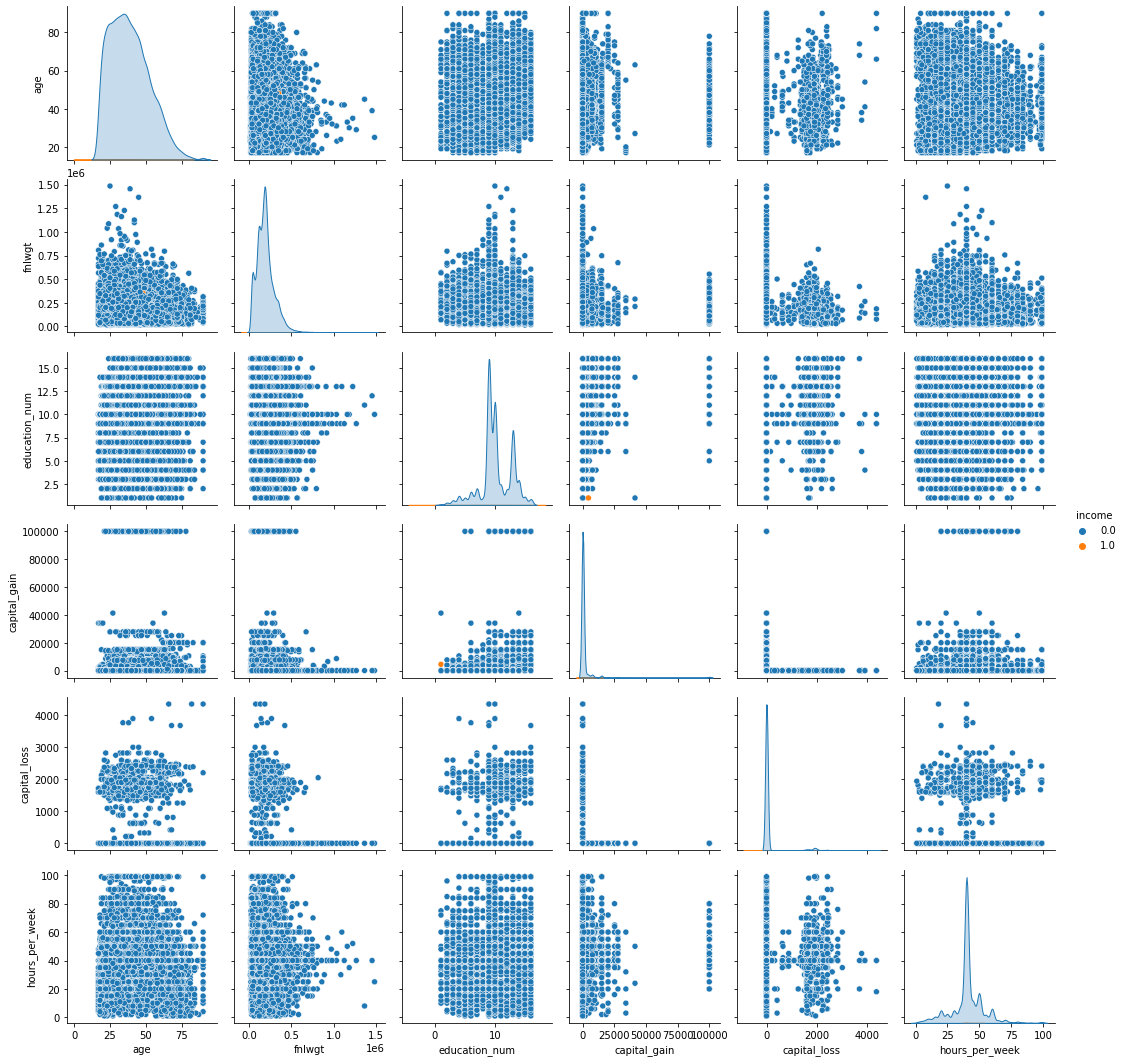

In [151]:
#now plot the data to know the distribution of the data
sns.pairplot(file2, hue='income', vars=['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'])


# Naive Bayes Classifier

In [152]:
#apply naive bayes algorithm
from sklearn.model_selection import train_test_split
X = file2.drop(['income'], axis=1)
y = file2['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [153]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9870149945895811


<AxesSubplot:>

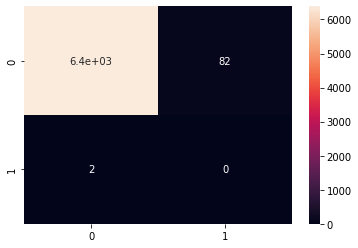

In [154]:
#visualizing the data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


# Decision Tree Classifier

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9982995826248261


<AxesSubplot:>

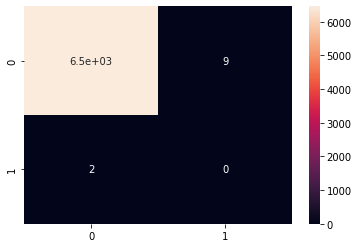

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [157]:
# apply decision tree with hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=5)
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9996908332045138
